# **Workshop VIII** <br/> *Regression Tree, Random Forest, Bagging and Boosting*

This notebook aims to provide a practical overview of regression trees, random forests, as well as bagging and boosting. After this workshop, the student should be able to know:
* how to apply regression trees, random forests, or a bagging / boosting approach
* when to apply regression trees, random forests, or a bagging / boosting approach

In [10]:
# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.datasets import load_diabetes

## 1. Data Preprocessing and Exploration

### a. Load your dataset

In [11]:
diabetes = load_diabetes()
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']], columns=diabetes['feature_names'] + ['target'])

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### b. [OPTIONAL] Preprocess the data

Depending on your dataset, you can perform different techniques of data preprocessing such as dropping NaN values, create dummy variables or standardize your data.

### c. Split the dataset into features (independent variables) and target variable (dependent variable) 

In [12]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (442, 10), y shape: (442,)


### d. Split the dataset into training and testing sets

In [13]:
test_size = 0.3
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (309, 10), y_train shape: (309,)
X_test shape: (133, 10), y_test shape: (133,)


## 2. Regression Tree

In this exercise, we will use sklearn.tree.DecisionTreeRegressor.

If you want to find more information about the hyperparameters that this method uses, please visit: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### Define and train the model

In [14]:
# Define an Regression Tree object using DecisionTreeRegression 
regression_tree = DecisionTreeRegressor(max_depth=3) # you can change the max_depth and/or use other parameters

# Fit the model
regression_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### Make predictions and evaluate the model

In [15]:
# Make predictions
y_pred_cart = regression_tree.predict(X_test)

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_cart)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3616.769894653006


### Examples of visualization techniques for qualitative interpretations and analysis

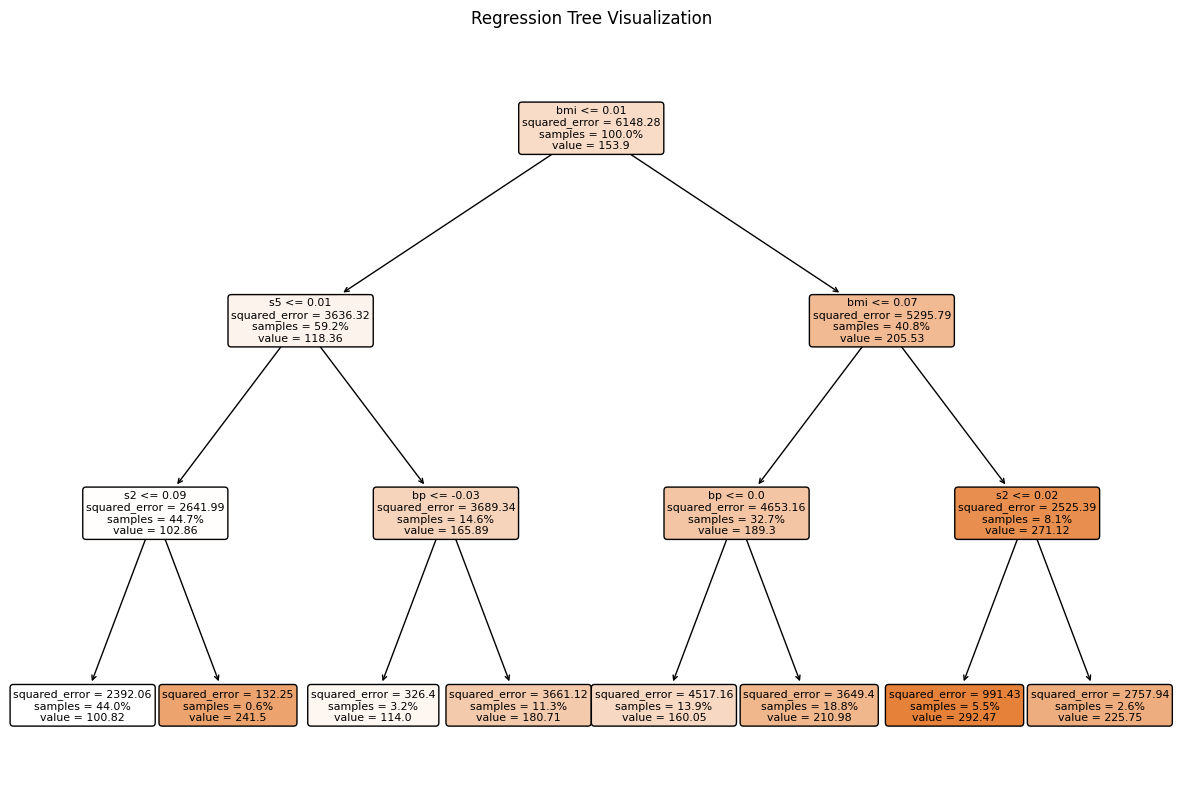

In [17]:
# Visualize the regression tree using plot_tree
plt.figure(figsize=(15, 10))
plot_tree(regression_tree, feature_names=list(X.columns), filled=True, rounded=True, proportion=True, precision=2)
plt.title("Regression Tree Visualization")
plt.show()

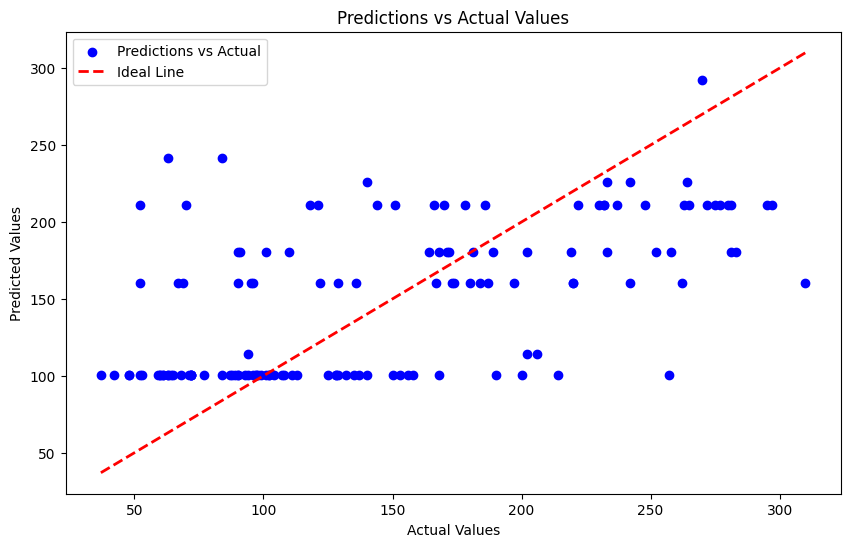

In [18]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cart, color='blue', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## 3. Random Forest

In this exercise, we will use the class sklearn.ensemble.RandomForestRegressor.

If you want to find more information about the hyperparameters that this method uses, please visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Define and train the model

In [19]:
# Define an Random Forest object using RandomForestRegressor 
rf_model = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

### Make predictions and evaluate the model

In [20]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [21]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2788.969943609023


## 4. Understand the parameters of random forest

### Feature importances

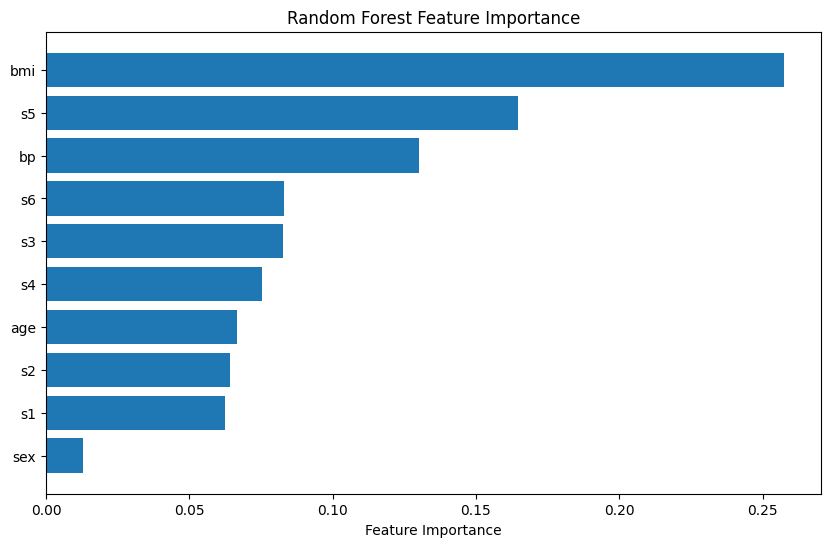

In [22]:
# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

#### Visualization

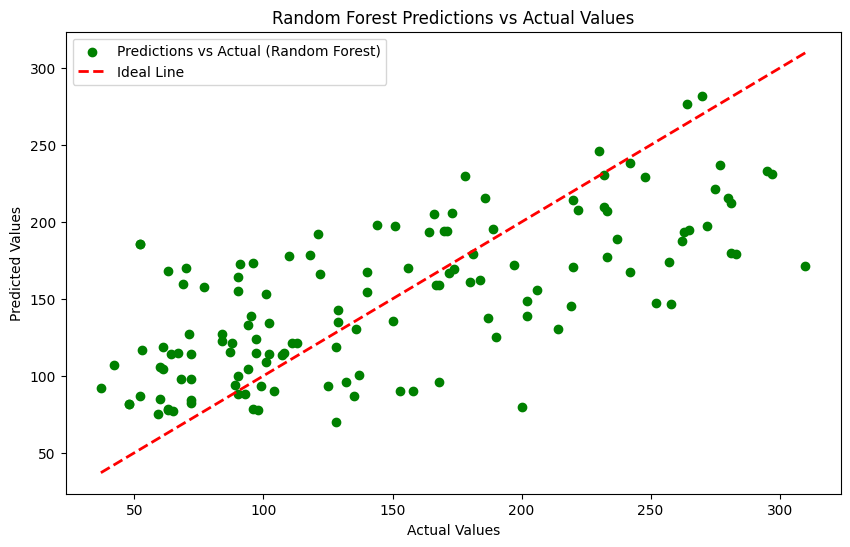

In [23]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predictions vs Actual (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

What if we use fewer or more estimators in random forest? Plot the curve to see how the MSE change for different value of n_estimators.

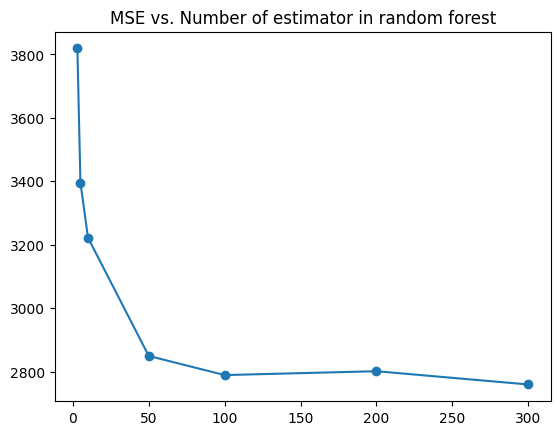

In [24]:
nList = [3,5,10,50,100,200,300]
mseList = []
for nEst in nList:
    # Define an Random Forest object using RandomForestRegressor 
    rf_model = RandomForestRegressor(n_estimators=nEst, max_features='sqrt', random_state=42)
    
    # Fit the model
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_nrf = rf_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred_nrf)
    mseList.append(mse)

plt.plot(nList,mseList,"-o")
plt.title('MSE vs. Number of estimator in random forest')
plt.show()

In the following part, we are going to cover two fundamental ensemble learning techniques: **Bagging** and **Boosting**

## 5. Bagging - Training and Evaluating a Model of Your Choice
The function sklearn.ensemble.BaggingRegressor can be utilized to perform the bagging on your own algorithms.

Try to implement it in a way that the base estimator is the linear regression model.

If you want to find more information about the hyperparameters that this method uses, please visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [25]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

# Defining and fitting the model
bagging_model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print(f'Mean Squared Error (Bagging): {mse_bagging}')

Mean Squared Error (Bagging): 2825.6814974931926


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


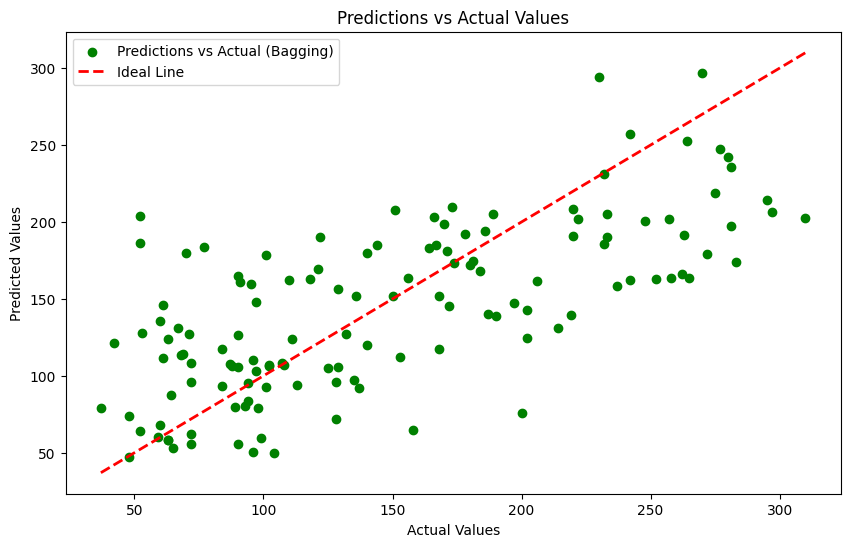

In [26]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bagging, color='green', label='Predictions vs Actual (Bagging)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## 6. Boosting

#### AdaBoost Regressor

In [27]:
from sklearn.ensemble import AdaBoostRegressor

# Defining and fitting the model
adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
print(f'Mean Squared Error (AdaBoost): {mse_adaboost}')

Mean Squared Error (AdaBoost): 2905.820254118815


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


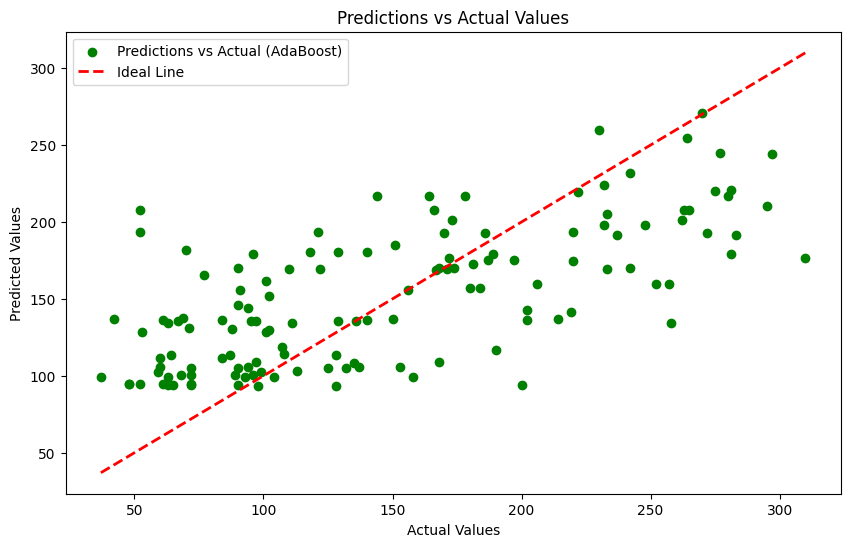

In [28]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost, color='green', label='Predictions vs Actual (AdaBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### XGBoost Regressor

You may need to install xgboost first:

$ pip install xgboost

In [29]:
from xgboost import XGBRegressor

# Defining and fitting the model
xgb_model = XGBRegressor(max_depth=3, n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')

Mean Squared Error (XGBoost): 3221.4925273050007


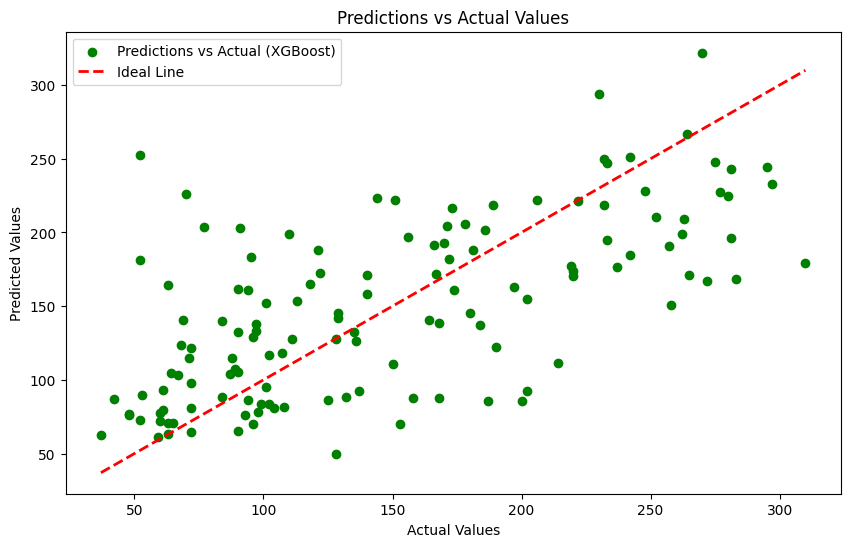

In [30]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='Predictions vs Actual (XGBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## 7. [OPTIONAL] Try XGBoost or random forest in classification task.
Do you think the above algorithms will work for classification tasks? Next, we try to use them for classification tasks.

For simplicity we discretize our $y$ value into two classes through some simple binning.

In [48]:
from sklearn.preprocessing import KBinsDiscretizer

# Reshape y_train to use with KBinsDiscretizer (it expects 2D array)
y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

# Initialize the discretizer
discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')

# Fit the discretizer on the training data
discretizer.fit(y_test_reshaped)

# Now, transform y_train and y_test using the fitted discretizer
y_test_discrete = discretizer.transform(y_test_reshaped).astype(int)

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Another way to split a continous variable by the median:

In [46]:
def discretize_data_median(y_test):
    # Calculate the median
    median = y_test.median()

    y_test_discrete = (y_test > median).astype(int)
    return y_test_discrete

# Usage:
y_test_distrete = discretize_data_median(y_test)

Try to use XGBoost to predict their classes.

In [41]:
from xgboost import XGBClassifier

# Defining and fitting the model
xgbcls_model = XGBClassifier(max_depth=3, n_estimators=50, random_state=42)
xgbcls_model.fit(X_train, y_train_discrete)

# Make predictions
y_pred_xgbcls = xgbcls_model.predict(X_test)

# Evaluate the model
accuracy_xgbcls = accuracy_score(y_test_distrete, y_pred_xgbcls)
print(f'Accuracy (XGBoost): {accuracy_xgbcls}')

Accuracy (XGBoost): 0.7593984962406015


Try to use RandomForest to predict their classes.

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Define a Random Forest object using RandomForestClassifier
rfcls_model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)

# Fit the model
rfcls_model.fit(X_train, y_train_discrete)

# Make predictions
y_pred_rfcls = rfcls_model.predict(X_test)

# Evaluate the model
accuracy_rfcls = accuracy_score(y_test_distrete, y_pred_rfcls)
print(f'Accuracy (Random Forest): {accuracy_rfcls}')

Accuracy (Random Forest): 0.7669172932330827


## 8. Interpretation of your results

Use this space to analyse the performance of your trained models throughout this workshop. Some examples of ideas include:
* discussing about the influence of some hyperparameters (e.g.: max_depth for Decision Tree, n_estimators for Random Forest, etc.)
* comparing the results you obtained using plots or tables


_Write your answer here

## Additional: Plot all

Mean Squared Error for y_pred_cart: 3616.769894653006
Mean Squared Error for y_pred_rf: 2788.969943609023
Mean Squared Error for y_pred_bagging: 2825.6814974931926
Mean Squared Error for y_pred_adaboost: 2905.820254118815
Mean Squared Error for y_pred_xgb: 3221.4925273050007


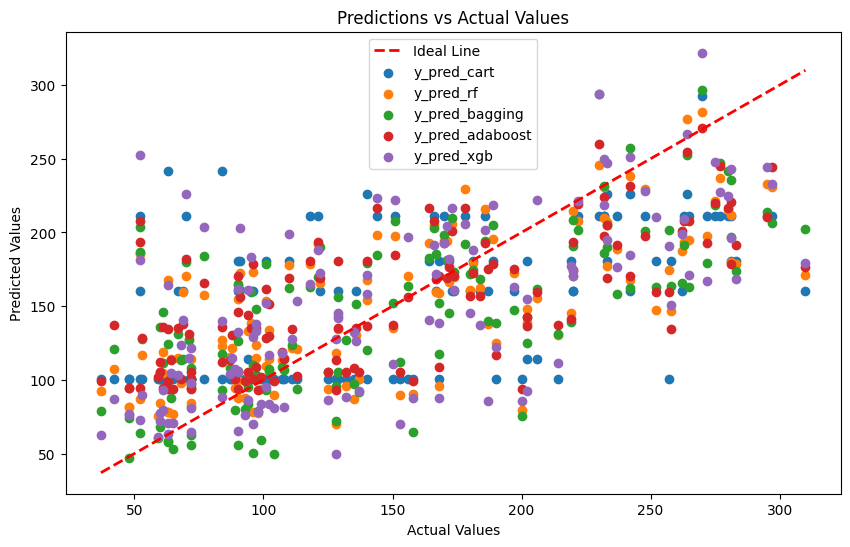

In [35]:
plt.figure(figsize=(10, 6))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
yvalue = [y_pred_cart,y_pred_rf,y_pred_bagging,y_pred_adaboost,y_pred_xgb]
ylabel = ['y_pred_cart','y_pred_rf','y_pred_bagging','y_pred_adaboost','y_pred_xgb']

for yi in range(len(ylabel)):
    # Plotting predictions vs actual values
    plt.scatter(y_test, yvalue[yi],label=ylabel[yi])
    mse_xgb = mean_squared_error(y_test, yvalue[yi])
    print(f'Mean Squared Error for {ylabel[yi]}: {mse_xgb}')

plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

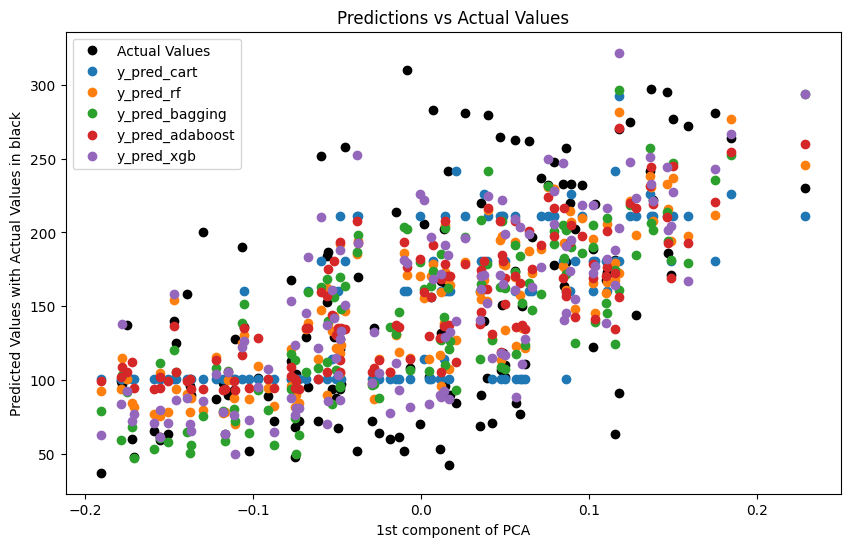

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df_trans = pca.fit_transform(X_test).flatten()

plt.figure(figsize=(10, 6))
plt.plot(df_trans,y_test,"ko",label="Actual Values")

for yi in range(len(ylabel)):
    plt.plot(df_trans,yvalue[yi],"o",label=ylabel[yi])
plt.title('Predictions vs Actual Values')
plt.xlabel('1st component of PCA')
plt.ylabel('Predicted Values with Actual Values in black')
plt.legend()
plt.show()